In [1]:
import sys
import pathlib

sys.path.append("../")

from statespace import *

In [2]:
pathlib.Path().resolve().parent

WindowsPath('C:/Users/NielsOta/Code/StateSpace')

In [3]:
base_dir = pathlib.Path().resolve().parent
data_dir = base_dir / 'data'
nile_path = data_dir / 'Nile.txt'

# StateSpace
- Non stationarity not a pain, but part of the model

# Smoothing
 
- identifying trends
- filtering through seasonality

# Option 1: Handing file path to constructor

6864.70385351888
6864.70385292489
6864.703852525494
6863.5481726195685
6863.548172027277
6863.548171629235
6863.366553673124
6863.366553081103
6863.366552683273
6609.675407076832
6609.6754068076825
6609.675406644459
6504.773516856276
6504.773516688821
6504.773516589912
6406.429707904679
6406.429707813686
6406.429707760241
6341.675717547096
6341.675717495715
6341.675717464981
6294.06648701769
6294.066486989601
6294.066486972075
6261.513576439571
6261.513576424378
6261.51357641421
6239.549493507655
6239.549493499686
6239.54949349373
6225.499214739113
6225.499214735125
6225.499214731568
6217.061791757485
6217.061791755663
6217.061791753478
6212.4246545616015
6212.424654560948
6212.424654559546
6210.522161413319
6210.522161413237
6210.522161412304
6209.354655352858
6209.354655353096
6209.354655352419
6208.523639679914
6208.523639680273
6208.523639679778
6208.555058426525
6208.555058423838
6208.555058426284
6207.938843828632
6207.938843828699
6207.938843828537
6207.968555582527
6207.9685555

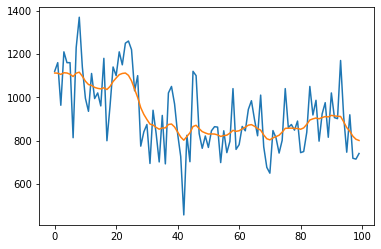

In [4]:
llm = LocalLevelModel(nile_path)
llm.fit()
plt.plot(llm.y)
plt.plot(llm.a_hat)

In [5]:
llm.residual_diagnostics()

[{'F_stat': 0.6069038807359911, 'p_val': 0.9216578989976075},
 {'N_stat': 0.2591567122284033, 'p_val': 0.7075482710444179},
 {'Q_stat': 13.443838107913292, 'p_val': 0.19990366077626592}]

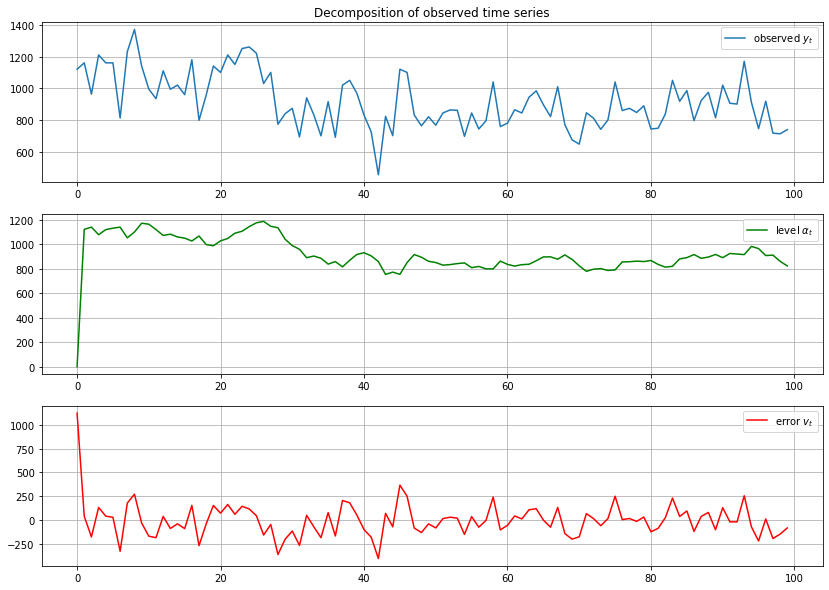

In [6]:
llm.display_decomposition()

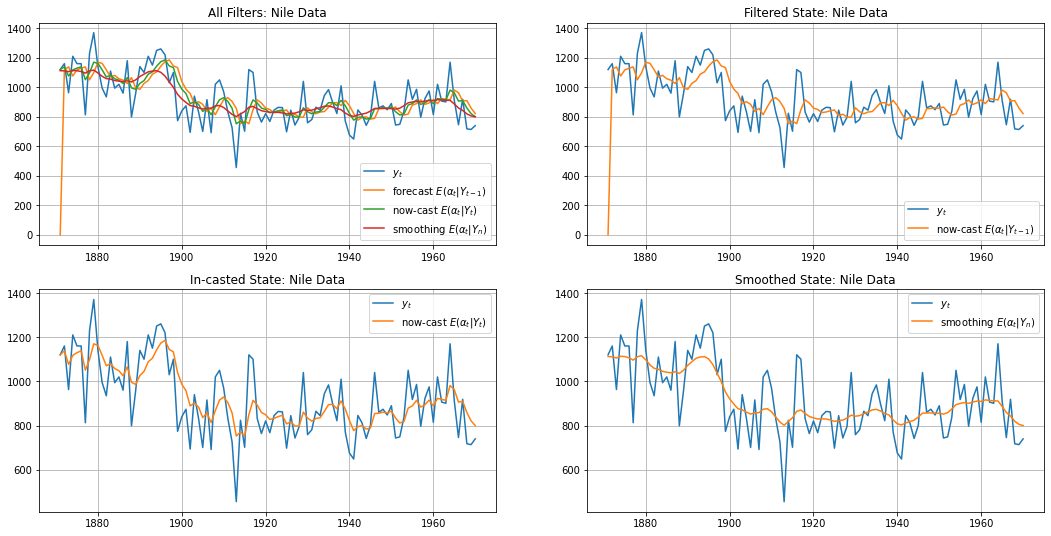

In [7]:
llm.display_filters()

# Option 2

(100, 1)
<class 'numpy.ndarray'>
Parameters: {'var_eta': 2014.4424691777388, 'var_eps': 16333.379508139558}


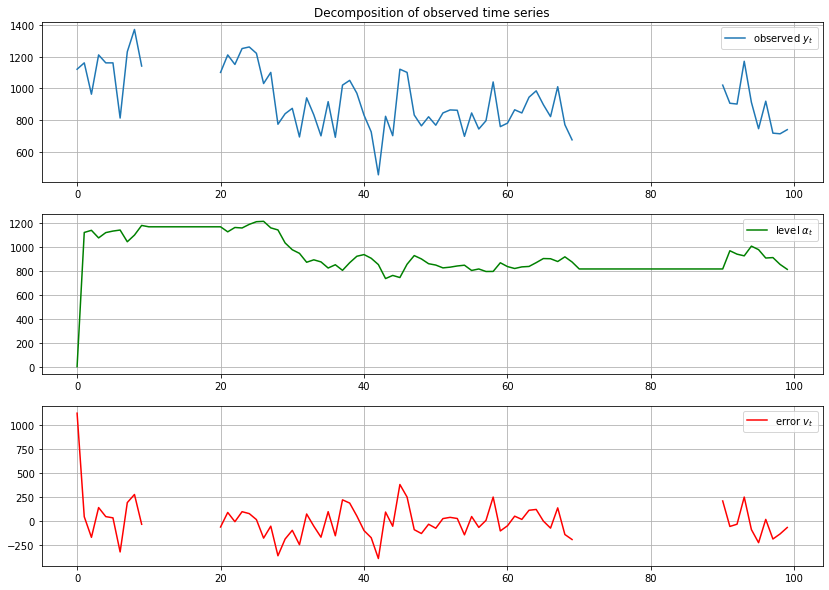

In [4]:
nile_data = pd.read_csv(nile_path).values.astype("float")
nile_data[10:20] = np.nan
nile_data[70:90] = np.nan

print(nile_data.shape)
print(type(nile_data))

llm = LocalLevelModel()
llm.fit(nile_data)
llm.a_hat

llm.display_decomposition()

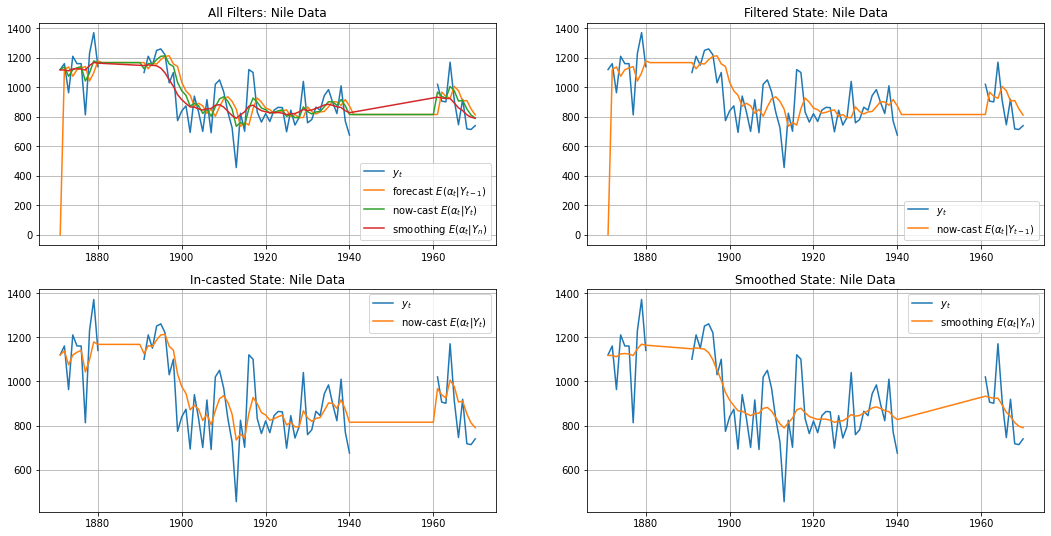

In [5]:
llm.display_filters()

# Endgame

- Non linear state space model (no package that has this)
- Unobserved component models
  - dont only filter out seasonality, but extract it out of signal, can make it time varying

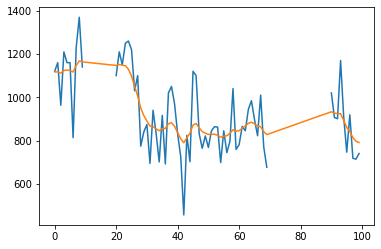

In [8]:
plt.plot(llm.y)
plt.plot(llm.a_hat)